<a href="https://colab.research.google.com/github/Sansith/gpt2sp/blob/main/Clean_data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/MyDrive/Year4/FYP/effort-estimation/gpt2sp

/content/drive/MyDrive/Year4/FYP/effort-estimation/gpt2sp


In [3]:
ls

abe0/                               models/
all_tokenizers/                     model_training_notebook_bigBird.ipynb
base_model_training_notebook.ipynb  model_training_notebook.ipynb
BigBird.py                          model_training_notebook_new_impl.ipynb
Clean_data_Set.ipynb                __pycache__/
corpus_tokenization_comparison/     README.md
custom_transformers_interpret/      results/
data_model_analysis/                sp_dataset/
GPT2SPEN.py                         tb/
GPT2SP_inspection_notebook.ipynb    tokenizer_training_notebook.ipynb
GPT2SP.py                           vocab_and_tokenization_comparison.ipynb
LICENSE                             wandb/
logo/                               xai_tokens/


In [13]:
def remove_jira_syntax(text):
    # Remove headings
    text = re.sub(r'h[1-6]\.\s+', '', text)

    # Remove text effects
    effects_patterns = [
        r'\*(.*?)\*',  # bold
        r'_(.*?)_',    # italic
        r'\?\?(.*?)\?\?',  # citation
        r'-(.*?)-',    # deleted
        r'\+(.*?)\+',  # inserted
        r'\^(.*?)\^',  # superscript
        r'~(.*?)~',    # subscript
        r'\{\{(.*?)\}\}',  # monospaced
        r'\{quote\}(.*?)\{quote\}',  # block quote
        r'\{color:[^}]+\}(.*?)\{color\}',  # colored text
    ]
    for pattern in effects_patterns:
        text = re.sub(pattern, r'\1', text)

    # Remove links and media
    links_patterns = [
        (r'\[.*?\|(.*?)\]', r'\1'),  # Keep the text after the pipe
        (r'\[https?:[^\]]+\]', ''),  # Remove external links
        (r'\[mailto:[^\]]+\]', ''),  # Remove email links
        (r'\[file:[^\]]+\]', ''),    # Remove file links
        (r'\[~[^\]]+\]', '')         # Remove user profile links
    ]

    # Apply each pattern and replacement in sequence
    for pattern, replacement in links_patterns:
        text = re.sub(pattern, replacement, text)

    # Remove lists, images, attachments, tables, and advanced formatting
    # This part is highly dependent on your specific needs and might require custom logic
    # to retain meaningful text while removing the syntax. Basic examples:
    text = re.sub(r'(![^\s]+?\!)', '', text)  # Remove images
    text = re.sub(r'\{anchor:[^}]+\}', '', text)  # Remove anchors
    text = re.sub(r'\|\|.*?\|\|', '', text)  # Remove table headers
    text = re.sub(r'\|.*?\|', '', text)  # Remove table rows
    text = re.sub(r'\{[^}]+\}', '', text)  # Remove advanced blocks like {panel} or {code}

    # Remove miscellaneous characters and cleanup
    text = re.sub(r'\\[\\@]', '', text)  # Escaped characters
    text = text.replace('----', '')  # Horizontal ruler
    text = re.sub(r'\n{2,}', '\n', text)  # Multiple newlines

    return text

In [18]:
import pandas as pd
import re

# Define the path to the Excel file
excel_file_path = './sp_dataset/marked_data/'
excel_file_out_path = './sp_dataset/sanatized/'
# Define the column index (starting from 0) or column name to clean
column_to_clean = 'description'

# Load the Excel file
def remove_html_tags(html_text):
    # Define the regex pattern for HTML tags
    pattern = re.compile('<.*?>')
    # Use the sub() method to replace all occurrences of the pattern with a "|" separator
    # Note: This will insert "|" where every HTML tag was, which may not be visually appealing
    clean_text = re.sub(pattern, '/', html_text)
    # Optionally, you might want to clean up multiple consecutive separators
    clean_text = re.sub('\/+', '/', clean_text).strip('|')
    return clean_text

# Function to clean a single text entry
def clean_text(_text):
    text = str(_text if _text else " ")
    text = remove_jira_syntax(text)
    text = remove_html_tags(text)
    # Remove special characters like asterisks and dashes
    text = re.sub(r"[\*\-]+", " ", text)
    # Standardize sections
    text = re.sub(r"\*DO\*", "\nDO:\n", text, flags=re.IGNORECASE)
    text = re.sub(r"\*Check\*", "\nCHECK:\n", text, flags=re.IGNORECASE)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Replace newlines and tabs with a space
    text = text.replace("\n", " ").replace("\t", " ")
    # Convert to lowercase
    text = text.lower()
    return text


In [3]:
df[column_to_clean]


NameError: name 'df' is not defined

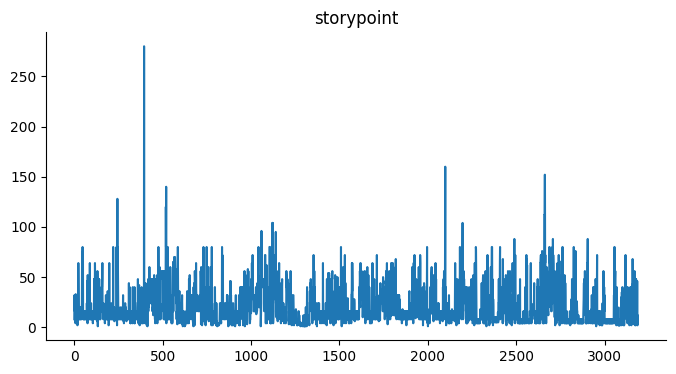

In [11]:
# @title storypoint

from matplotlib import pyplot as plt
df['storypoint'].plot(kind='line', figsize=(8, 4), title='storypoint')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
def clean_ds (file_name):
    
    df = pd.read_csv(excel_file_path+ file_name+".csv")
    # Apply the cleaning function to the specified column
    df[column_to_clean] = df[column_to_clean].apply(clean_text)

    # Write the cleaned data back to the same Excel file
    df.to_csv(excel_file_out_path + file_name + ".csv", index=False)

    print("Data cleaning completed and written back to the Excel file.")



TRAIN_TEST_FILE_PAIRS = [
                        {'train': ['appceleratorstudio'], 'test': ['appceleratorstudio']},
                        {'train': ['aptanastudio'], 'test': ['aptanastudio']},
                        {'train': ['bamboo'], 'test': ['bamboo']},
                        {'train': ['clover'], 'test': ['clover']},
                        {'train': ['datamanagement'], 'test': ['datamanagement']},
                        {'train': ['duracloud'], 'test': ['duracloud']},
                        {'train': ['jirasoftware'], 'test': ['jirasoftware']},
                        {'train': ['mesos'], 'test': ['mesos']},
                        {'train': ['moodle'], 'test': ['moodle']},
                        {'train': ['mule'], 'test': ['mule']},
                        {'train': ['mulestudio'], 'test': ['mulestudio']},
                        {'train': ['springxd'], 'test': ['springxd']},
                        {'train': ['talenddataquality'], 'test': ['talenddataquality']},
                        {'train': ['talendesb'], 'test': ['talendesb']},
                        {'train': ['titanium'], 'test': ['titanium']},
                        {'train': ['usergrid'], 'test': ['usergrid']},
                        ]

for file in TRAIN_TEST_FILE_PAIRS:
    clean_ds(str(file["train"][0]))

Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
Data cleaning completed and written back to the Excel file.
